# Microplastic as Prey

Aleksandra Samotyja, Gordon Chambers, [John S Butler](johnsbutler.netlify.com)

TU Dublin

# Introduction
This webpage will describe a mathematical model that simulates impact of the introduction of microplastics on fish and salmon population using Python.
The webpage is divided into six parts:
* The first section outlines the normal predator prey interaction first observed in hare and lynx;
* The second section  will mathematically model the predator-prey relationship of salmon and small fish; 
* The third section describes and models the growth of the human population and increase in the production of microplastics; 
* The fourth section describes the impact of microplastics on the small fish, salmon and human population; 
* The fifth section shows the results of the simulations of the ecosystem  for different levels of plastic production rates;
* The final section presents some questions that arise from this problem.

The webpage is written such that it can be read by some one with no programming experience but if you want to read the code you can click on the button below.

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")
#from __future__ import print_function
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
#plastic_widget1 = widgets.FloatSlider(min=0.001, max=1, step=0.01,value=0.1)
#plastic_widget = widgets.FloatSlider(min=0.001, max=1, step=0.01,value=0.1)
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Predator Prey 
## Predators and prey
The cyclical relationship of Predators and Prey in the wild  means that when there is an abundance of prey, the predators will eat more and the prey population will increase. On the other hand, if there is a shortage in the number of prey, the number of predators will decrease due to the scaricty of food source [1]. 


## Fish and Salmon
In a balanced eco system the relationship between small fish (prey) and salmon (predator) can be described mathematically using a Loketta-Volterra model [2-4]
\begin{equation}
\begin{array}{cl}
\frac{d F}{dt}=F-0.02SF,\\
\frac{d S}{dt}=-0.05S+0.001 F S,\\
\end{array}
\end{equation}
this set of equations models the interaction between small fish (F) and salmon (S). 

The equations can be written in words as:

| The rate of change of population | is equal to  | the current population with a control factor|
|-----------------------------------|--------------|------------------------------------------------------------------|
| The increase in fish population  $\frac{d F}{dt}$ | is equal to  | the current fish population $F$ minus the amount of fish salmon eat $-0.02FS$ |
| The increase in salmon population $\frac{d S}{dt}$ | is equal to | the current salmon population $-0.05S$ plus the amount of fish salmon eat $+0.001FS$|

Or they can be summed up as the salmon are the predators who eat the small fish to survive.

Figure 2 shows a simulation of the populations of salmon and small fish from 2000 to 2100, assuming that nothing is added to enviroment.  The salmon population fluxuates between 45 and 55 billion while the small fish population fluctuates from 25 to 85 billion. The equation illustates a relative equilibrium between the two populations ensuring neither population gets too big or too small.

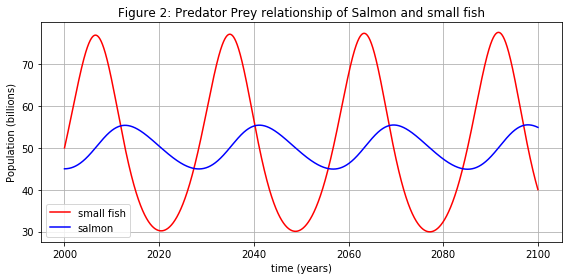

In [2]:
# INITIAL CONDITIONS
N=10000
time = np.linspace(2000, 2100, N )              # time
h=100/N
fish=50*np.ones(N) # 60 billions small fish
salmon=45*np.ones(N) # 30 billion salmon
SMALLFISH = np.array( [1,-0.02])
SALMON= np.array([-0.05,0.001])
for i in range (1,N):
    fish[i]=fish[i-1]+h*fish[i-1]*(SMALLFISH[0]+SMALLFISH[1]*salmon[i-1])
    salmon[i]=salmon[i-1]+h*salmon[i-1]*(SALMON[0]+SALMON[1]*fish[i-1])
## PLOTTING
fig = plt.figure(figsize=(8,4))
plt.plot(time, fish, 'r-', label='small fish')
plt.plot(time, salmon, 'b-', label='salmon')
plt.grid()
plt.xlabel('time (years)')
plt.ylabel('Population (billions)')
plt.title('Figure 2: Predator Prey relationship of Salmon and small fish')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Humans
## Human population growth
Humans  are adaptable omnivores who have fire and tools so we are able to eat most animals and plants [5]. This means humans violate this the cyclical relationship. When humans have eaten all of one prey, such as the dodo, we just move on to another prey with seemingly little impact on human population growth. From 1800 to 1900 the human population increased by 60% from 1 billion to 1.6 billion. From 1900 to 2000 the human population has increased by almost 400% from 1.6 to 6 billion. Figure 3 shows the predicted increase in human population (yellow) in billions from 6 billion in 2000 to around 16 billion in 2100. The population should level off as number of foods sources can only sustain so many huamns. This growth can be descibed as a the equation:
\begin{equation}
\frac{d H}{dt}=0.05H-0.003H^2,
\end{equation}
where $H$ is human population.
The equations can be written in words as:

| Rate of change of Population                       | is equal to  | the current population and a control factor                                                     |
|----------------------------------------------------|-----------------|------------------------------------------------------------------------------------------------|
| The increase in human population  $\frac{d H}{dt}$ | is equal to  | the current human population $0.05H$ minus a factor to control for over population $-0.003H^2$ |
It can be summed up as the human population keeps increasing until there is nothing left to eat.

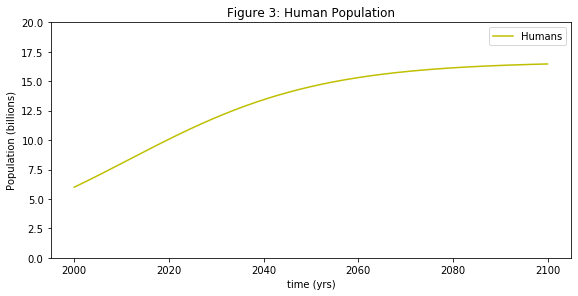

In [3]:
humans=6*np.ones(N) # 6 billion humans

for i in range (1,N):              
    humans[i]=humans[i-1]+h*humans[i-1]*(0.05-0.003*humans[i-1]) 
fig= plt.figure(figsize=(8,4))
plt.plot(time, humans, 'y-', label = 'Humans')
plt.xlabel('time (yrs)')
plt.ylabel('Population (billions)')
plt.legend(loc='best')
plt.tight_layout()
plt.ylim(0,20)
plt.title('Figure 3: Human Population')
plt.show()

## Impact of Humans
Due to the increasing human population the demand on food sources is getting highter and higher. This demand could put popular food sources at risk of being eaten into extinction. In the recent decades, governments have tried to address this by introduction quotas and identifying at risk animals. While this can address the direct impact of humans on the ecosystem it does not address the indirect by products of modern life such as microplastics.

## MicroPlastics and Humans
Microplastics is any plastic entity which is approximately less than 5mm in size [6] (http://www.dit.ie/physics/research/microplastics/).
The increase in microplastics can be modelled as a relationship with the human population. This can be descrived by the equation:  
\begin{equation}
\begin{array}{cl}
\frac{d P}{dt}=plastic_{rate}H.
\end{array}
\end{equation}

The parameter $plastic_{rate}$ is used the describe the relationship between the human population (H) and the rate of increase in microplastics (P) production. 

| The rate of change of population | is equal to $=$ | the current population with a control factor|
|-----------------------------------|--------------|------------------------------------------------------------------|
| The increase in microplastics  $\frac{d P}{dt}$ | is equal to $=$ | the current human population $H$ times the plastic production rate $plastic_{rate}$ |

Positive values of production rate mean the more humans, the more microplastics. 
Even if the production of micropalstics is stopped, the amount of microplastics will remain the same. So even after humans are gone, our plastic foot print will remain.

In [4]:
def plastic_model(plastic_rate):
    humans=6*np.ones(N) # 30 billion salmon

    plastics=1*np.ones(N) # 1 billion microplastics
    for i in range (1,N):              
        plastics[i]=plastics[i-1]+h*humans[i-1]*(plastic_rate) 
        humans[i]=humans[i-1]+h*humans[i-1]*(0.05-0.003*humans[i-1]) 

    fig= plt.figure(figsize=(8,3))
    plt.plot(time, plastics, 'g', label = 'Microplastics')
    plt.plot(time, humans, 'y-', label = 'Humans')
    plt.xlabel('time (yrs)')
    plt.ylabel('Population')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('Figure 4: Relationship of Human Population and Microplastics with a plastic rate =  %s'%(plastic_rate))
    plt.show()

In Figure 4 the rate of microplastic production can be manipulated to illustrate the result of a change in amount of microplastics.  The figure plots modelled microplastics (green) and human population as a function of time from 2000 to 2100. 

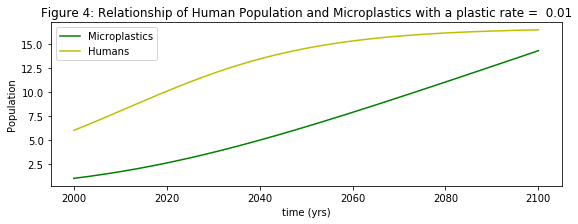

In [5]:
plastic_model(0.01);


# Microplastics and Fish
While fishing quotas account for the direct impact of man on fish it does not account for by-products of modern life like mircroplastics to the ecosystem. It has been documented that fish are now 
consuming microplastics which can impact the population of fish.  
For these reasons we consider microplastics as a predator of small fish.
To model the impact of microplastics on small fish (prey) and the knock on effect it has on salmon (prey). 

To model the negative impact of microplastics on the small fish population an extra term is added to the small fish equation:
\begin{equation}
\begin{array}{cl}
\frac{d F}{dt}=F-0.02SF-0.01FP.\\
\end{array}
\end{equation}


| The rate of change of population   | is equal to $=$ | the current population with a control factor|
|-----------------------------------|-----------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| The change in small fish  $\frac{d F}{dt}$ | is equal to $=$ | the current fish population $F$ minus the amount salmon eat $-0.02SF$ minus the amount that die due to microplastics $-0.01FP$ |


## The ecosystem model
Bringing all these equations together results in a system of four first order differential equations which describe a simple ecosystem of,

the population of Small Fish (F),
\begin{equation}
\frac{d F}{dt}=F-0.02SF-0.01FP;
\end{equation}
the population of salmon (S),
\begin{equation}
\frac{d S}{dt}=-0.05S+0.001 F S;
\end{equation}
plastic production (P),
\begin{equation}
\frac{d P}{dt}=plastic_{rate}H;
\end{equation}
and human population (H),
\begin{equation}
\frac{d H}{dt}=0.0001H-0.002H^2+0.0006SH+0.001HF.
\end{equation}
The system was modeled from 2000 to the year 2100 are shown in the Figures bellow for different plastic rates. The figures show the small fish population  in red, the salmon population in blue, the plastics in green and human population in yellow. 

In [6]:
def plastic_fish_model(plastic_rate):   
    # INITIAL CONDITIONS
    fish=50*np.ones(N) # 60 billions small fish
    salmon=45*np.ones(N) # 30 billion salmon
    plastics=0.001*np.ones(N) # 1 billion microplastics
    humans=6*np.ones(N) # 7 billion humans

    SMALLFISH = np.array( [1,-0.02,-0.01])
    SALMON= np.array([-0.05,0.001,0])
    for i in range (1,N):
        fish[i]=fish[i-1]+h*fish[i-1]*(SMALLFISH[0]+SMALLFISH[1]*salmon[i-1]+SMALLFISH[2]*(plastics [i-1]))
        salmon[i]=salmon[i-1]+h*salmon[i-1]*(SALMON[0]+SALMON[1]*fish[i-1]+SALMON[2]*plastics [i-1])
        plastics[i]=plastics[i-1]+h*humans[i-1]*(plastic_rate)
        humans[i]=humans[i-1]+h*humans[i-1]*(0.05-0.003*humans[i-1]) 
    fig = plt.figure(figsize=(8,6))
    plt.title('Figure: Impact of plastic rate =  %s on the ecosystem'%(plastic_rate))
    plt.plot(time, fish, 'r-', label='small fish')
    plt.plot(time, salmon, 'b-', label='salmon')
    plt.plot(time, plastics, 'g', label='Microplastics')
    plt.plot(time, humans, 'y', label='Humans')
    plt.grid()
    plt.title('The impact of microplastics')
    plt.xlabel('time (years)')
    plt.ylabel('Population in Billions')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Results
The figure below shows the output of the model for a plastic rate of 0.05. The introduction of microplastics results in a decrease in the small fish population which then impacts the salmon population as small fish are their primary food source. 

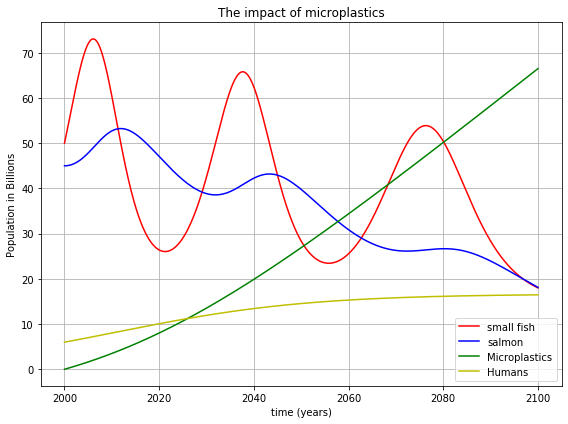

In [7]:
plastic_fish_model(0.05)

If the production rate of plastics is doubled to 0.1. The introduction of microplastics in to the ecosystem will lead to the extinction of small fish (red) by 2080 and salmon (blue) will be more or less extinct by 2100. 

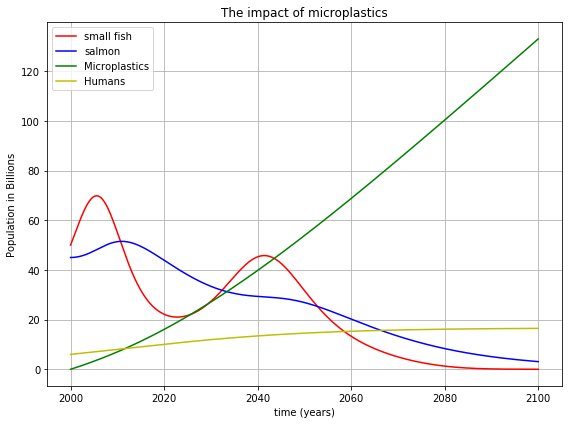

In [8]:
plastic_fish_model(0.1)

# Open Questions

The model shows the destructive impact of microplastics on a simple ecosystem model of small fish, salmon, microplastics and humans. Mathematical models of this type can be used to discuss

The immediate questions that arise from this simulation are:
1. What is our current rate of plastic production?
2. How will the extinction of small fish impact the human population?
3. How can we do to prevent this from happening?


# References

[1] Lynx-hare  fur  trade.https://theglyptodon.wordpress.com/2011/05/02/the-fur-trades-records/.  Accessed:2018-03-20.

[2] Wikipedia contributors. (2018, July 27). Lotka–Volterra equations. In Wikipedia, The Free Encyclopedia. Retrieved 09:33, September 7, 2018, from https://en.wikipedia.org/w/index.php?title=Lotka%E2%80%93Volterra_equations&oldid=852191432 

[3] Alfred J Lotka.   Analytical note on certain rhythmic  relations inorganic  systems.Proceedings of the National Academy of Sciences,6(7):410–415,1920.

[4]  Vito Volterra.  Fluctuations in the abundance of a species consid-ered mathematically.Nature,118:558–560,1926.

[5] Harari, Yuval N. (2015). Sapiens : a brief history of humankind. New York :Harper.

[6] Gordon Chambers, (2017) Microplastics, Retrieved 09:33, September 7, 2018, http://www.dit.ie/physics/research/microplastics/
